In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

from   astropy.table     import Table

In [2]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot
from   findfile import findfile

In [4]:
version = 'GAMA4'
survey  = 'gama'
dryrun  = False

In [5]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA']  = Table.read(fpath)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    print(fpath)
    
    return result

In [6]:
! pwd

/cosma/home/durham/dc-wils7/DESI/docs/nb


In [7]:
fpaths = sorted(glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/{}*.fits'.format(survey)))
fpaths

['/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/g

In [8]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_2.fits
/cosma/home/durham/dc-wils7/

In [9]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE    = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
86187,587722983890026653,185.64764412,0.45825774,17.885168,0.23773,4,G12_Y1_IN1_366,6,20.97136,19.13244,17.69423,17.180195,16.8645,0.23773,840.5726708609474,39.62287632944614,G12,0,0,-675.8062612682004,-66.83079688776589,5.431651350640607,676.2613794170416,62.116879849571745,4.6905186350961925,1.4382114,17.885168,1.0221831617635122,0,6,0.10036243227669306,0.5163907115532198,0.33652183845436306,0.9173801631494414,0.8573531163449608,0.8,-0.2305981,-0.190184,-21.84363198535866,-21.884046095184747,-22.074230092338983,39.72880006092018,39.9593981679005,39.76921417074627,-0.02610221695577676,0.25065673311151676,0.19062266140642437,0.51583202282518,-21.69773280831072
617429,588848900463329480,211.51215914,0.33337858,16.491335,0.05383,4,G15_Y6_072_126,6,18.441204,17.068653,16.389126,15.991108,15.69622,0.05383,168.3225606128227,36.13071164621924,G15,0,0,-136.1675749443299,-83.48335106299008,0.9293608415316806,136.7473174971628,82.53184613359454,0.779495741336187,0.6795273,16.491335,0.743982896440262,0,5,-0.1549470888593293,-0.2194027025847476,0.07143610749723148,0.0980003458903182,0.652963044321757,0.8,-0.052215103,-0.043064002,-19.65859773549533,-19.667748836607696,-19.710812838555338,36.14993265065647,36.202147753716474,36.15908375176883,-0.14544953276563438,-0.1915606934090779,0.07127534559656673,0.07361459630458539,-19.658436973594668
594128,588848899929800874,219.05986017,-0.07440745,17.661882,0.13694,5,344534744807008256,6,19.502266,18.28102,17.649033,17.278406,17.08318,0.13694,454.3391400668327,38.286900758504636,G15,0,0,-310.2965986762804,-251.81045450990524,-0.5189628516176182,312.04413432684754,249.64068275010177,-0.8609420807934335,0.6319866,17.661882,0.5739814157838801,0,4,-0.08154459967853901,-0.023539397420426808,0.13025891341234525,0.2316107736620236,0.5306347577923138,2.12,-0.13283181,-0.2903128,-20.622445459499378,-20.464964474573154,-20.755277271404285,38.28432786001208,38.417159671916984,38.12684687508585,-0.07849917485313306,-0.019353226563168485,0.13822570350906804,0.2458220631504948,-20.6304122495961
619784,588848900467655041,221.331891,0.28400507,19.199787,0.2063,4,G15_Y2_014_259,6,22.054535,20.266598,19.106667,18.666481,18.32868,0.2063,715.7382006779324,39.27377098589429,G15,0,0,-445.5266613190083,-391.84432420106833,2.9410373795726867,448.2510540490064,388.72820986399864,2.449786808740405,1.1599312,19.199787,0.8740424713218576,0,6,0.025702647521857025,0.31159135906132757,0.25323595602057025,0.6765667657893946,0.7366003730925038,0.8,-0.20011102,-0.16504,-20.127108785391155,-20.162179800749126,-20.32721980202228,39.32689592528373,39.527006941914856,39.3619669406417,-0.041940240814488536,0.1622401598981713,0.17478463754771256,0.4274154496118346,-20.048657466918296
517646,588010358528868746,133.10434664,2.46904323,19.02159,0.21168,4,G09_Y1_CX2_265,6,22.315638,20.25712,18.987331,18.496666,18.107693,0.21168,736.8315164616245,39.33684096822303,G9,0,0,-415.15174372520573,443.57337261322016,26.19

In [10]:
fpath = findfile(ftype='ddp', version=version, dryrun=dryrun, survey=survey)
ddp   = Table.read(fpath)
ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3]
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64
86187,587722983890026653,185.64764412,0.45825774,17.885168,0.23773,4,G12_Y1_IN1_366,6,20.97136,19.13244,17.69423,17.180195,16.8645,0.23773,840.5726708609474,39.62287632944614,G12,0,0,-675.8062612682004,-66.83079688776589,5.431651350640607,676.2613794170416,62.116879849571745,4.6905186350961925,1.4382114,17.885168,1.0221831617635122,0,6,0.10036243227669306,0.5163907115532198,0.33652183845436306,0.9173801631494414,0.8573531163449608,0.8,-0.2305981,-0.190184,-21.84363198535866,-21.884046095184747,-22.074230092338983,39.72880006092018,39.9593981679005,39.76921417074627,-0.02610221695577676,0.25065673311151676,0.19062266140642437,0.51583202282518,-21.69773280831072,1.9148312,0.44663114086923167,0.0,-5.885168,0.019571442349045218,0.0,32958772.02542144,1 .. 0,1 .. 0
617429,588848900463329480,211.51215914,0.33337858,16.491335,0.05383,4,G15_Y6_072_126,6,18.441204,17.068653,16.389126,15.991108,15.69622,0.05383,168.3225606128227,36.13071164621924,G15,0,0,-136.1675749443299,-83.48335106299008,0.9293608415316806,136.7473174971628,82.53184613359454,0.779495741336187,0.6795273,16.491335,0.743982896440262,0,5,-0.1549470888593293,-0.2194027025847476,0.07143610749723148,0.0980003458903182,0.652963044321757,0.8,-0.052215103,-0.043064002,-19.65859773549533,-19.667748836607696,-19.710812838555338,36.14993265065647,36.202147753716474,36.15908375176883,-0.14544953276563438,-0.1915606934090779,0.07127534559656673,0.07361459630458539,-19.658436973594668,3.3086643,0.21805927999858019,0.0,-4.491335,0.007133602958665704,0.0,4474382.595745936,0 .. 0,1 .. 1
594128,588848899929800874,219.05986017,-0.07440745,17.661882,0.13694,5,344534744807008256,6,19.502266,18.28102,17.649033,17.278406,17.08318,0.13694,454.3391400668327,38.286900758504636,G15,0,0,-310.2965986762804,-251.81045450990524,-0.5189628516176182,312.04413432684754,249.64068275010177,-0.8609420807934335,0.6319866,17.661882,0.5739814157838801,0,4,-0.08154459967853901,-0.023539397420426808,0.13025891341234525,0.2316107736620236,0.5306347577923138,2.12,-0.13283181,-0.2903128,-20.622445459499378,-20.464964474573154,-20.755277271404285,38.28432786001208,38.417159671916984,38.12684687508585,-0.07849917485313306,-0.019353226563168485,0.13822570350906804,0.2458220631504948,-20.6304122495961,2.1381168,0.3781070072100413,0.0,-5.6618824,0.010322257113273553,0.0,20969684.250309538,1 .. 0,1 .. 0
619784,588848900467655041,221.331891,0.28400507,19.199787,0.2063,4,G15_Y2_014_259,6,22.054535,20.266598,19.106667,18.666481,18.32868,0.2063,715.7382006779324,39.27377098589429,G15,0,0,-445.5266613190083,-391.84432420106833,2.9410373795726867,448.2510540490064,388.72820986399864,2.449786808740405,1.1599312,19.199787,0.8740424713218576,0,6,0.025702647521857025,0.31159135906132757,0.25323595602057025,0.6765667657893946,0.736

In [11]:
ddp.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'False'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0190299991518259),
             ('DDP1_ZMAX', 0.2715100049972534),
             ('DDP1_VZ', 8338406.912746496),
             ('DDP1ZLIMS_NGAL', 121975),
             ('DDP1_NGAL', 50872),
             ('DDP1_DENS', 0.00610092557635135),
             ('DDP2_ZMIN', 0.0188400000333786),
             ('DDP2_ZMAX', 0.1936399936676025),
             ('DDP2_VZ', 3179460.348095798),
             ('DDP2ZLIMS_NGAL', 76273),
             ('DDP2_NGAL', 33593),
             ('DDP2_DENS', 0.01056562948492787),
             ('DDP3_ZMIN', 0.01882999949157238),
             ('DDP3_ZMAX', 0.1015100032091141),
             ('DDP3_VZ', 482216.0515798731),
             ('DDP3ZLIMS_NGAL', 20474),
             ('DDP3_NGAL', 9269),
             (

0	0	12.000	0.131	0.164	True
1	1	12.000	0.298	0.299	True
2	10	12.000	0.603	0.555	False
3	11	12.000	0.785	0.682	False
4	12	12.000	0.933	0.773	False
5	13	12.000	1.067	0.900	False
6	14	19.800	0.131	0.164	True
7	15	19.800	0.298	0.299	True
8	16	19.800	0.443	0.423	True
10	18	19.800	0.785	0.682	True
11	19	19.800	0.933	0.773	True
12	2	12.000	0.443	0.423	True
13	20	19.800	1.067	0.900	True
14	21	19.800	0.131	0.164	False
15	22	19.800	0.298	0.299	False
16	23	19.800	0.443	0.423	False
17	24	19.800	0.603	0.555	False
18	25	19.800	0.785	0.682	False
19	26	19.800	0.933	0.773	False
							FAINT: 27
20	27	19.800	1.067	0.900	False
22	4	12.000	0.785	0.682	True
23	5	12.000	0.933	0.773	True
24	6	12.000	1.067	0.900	True
							BRIGHT: 7
25	7	12.000	0.131	0.164	False
26	8	12.000	0.298	0.299	False
27	9	12.000	0.443	0.423	False


(-16.5, -22.5)

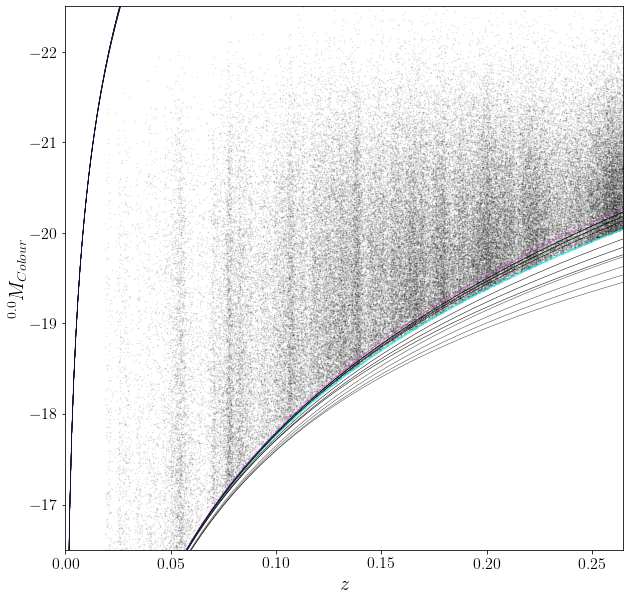

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(kE['ZGAMA'], kE['DDPMALL_0P0'], s=0.25, alpha=0.1, c='k')

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']
    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.75
    else:
        alpha = 1.00
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('$^{0.0}M_{Colour}$')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

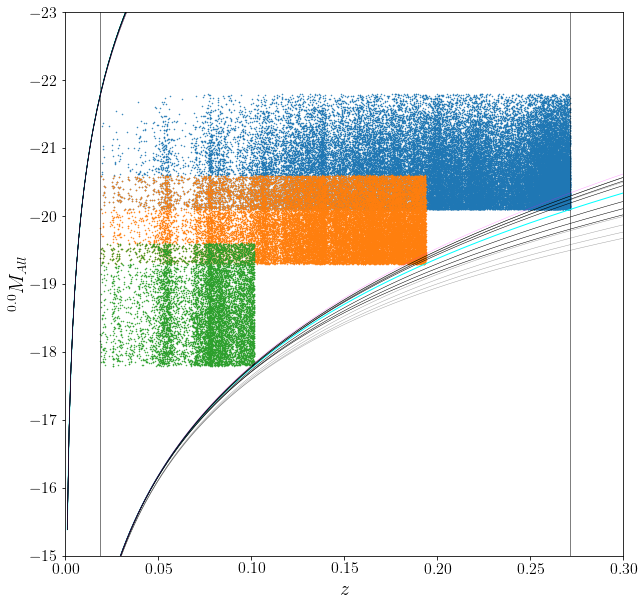

In [13]:
fig, ax   = plt.subplots(1, 1, figsize=(10,10))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

axes      = [ax, ax, ax]

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in ddp['DDP'].data[:,i]]
    ax.scatter(ddp['ZGAMA'][is_ddp], ddp['DDPMALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

axes      = [ax]
    
for ax in axes:
    ax.axvline(0.0188, c='k', lw=0.5)
    ax.axvline(0.2715, c='k', lw=0.5)
    
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.35
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('$^{0.0}M_{All}$')
        
        ax.set_xlim(  0.0, 0.300)
        ax.set_ylim(-15.0, -23.0)

# Done.